# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.084982e+01     8.638882e+00
 * time: 0.0013251304626464844
     1     2.809991e+01     5.329669e+00
 * time: 0.006417989730834961
     2     1.981234e+01     5.610230e+00
 * time: 0.012574195861816406
     3     1.390341e+01     3.700255e+00
 * time: 0.01843118667602539
     4     1.086140e+01     1.584364e+00
 * time: 0.02556014060974121
     5     9.909841e+00     2.335361e+00
 * time: 0.03262901306152344
     6     9.439734e+00     1.023704e+00
 * time: 0.03796219825744629
     7     9.066298e+00     9.817126e-01
 * time: 0.0433650016784668
     8     8.664677e+00     1.091902e+00
 * time: 0.08063411712646484
     9     8.452855e+00     9.806647e-01
 * time: 0.08375310897827148
    10     8.297821e+00     7.269141e-01
 * time: 0.08717203140258789
    11     8.175496e+00     6.451008e-01
 * time: 0.09037208557128906
    12     8.168126e+00     1.247283e+00
 * time: 0.09293603897094727
    13     8.125221e+00     7.638474e-01
 * ti

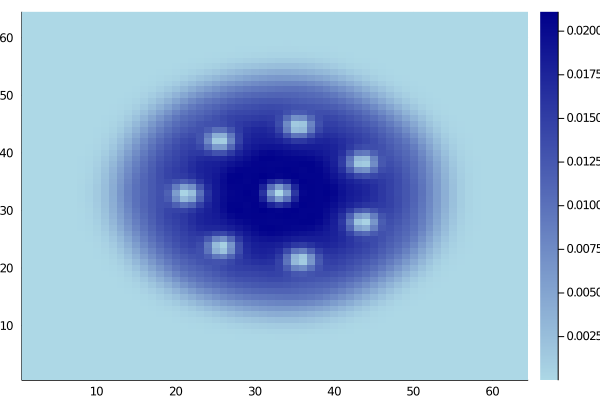

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)